# K-NEAREST NEIGHBOURS

In [1]:
#Importing Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Importing Dataset

ZOO = pd.read_csv("Zoo.csv")

In [3]:
ZOO.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#EDA

In [5]:
ZOO.shape

(101, 18)

In [6]:
ZOO.columns


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [7]:
ZOO.nunique()


animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [8]:
ZOO['catsize'].unique()

array([1, 0], dtype=int64)

In [9]:
ZOO['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

<AxesSubplot:>

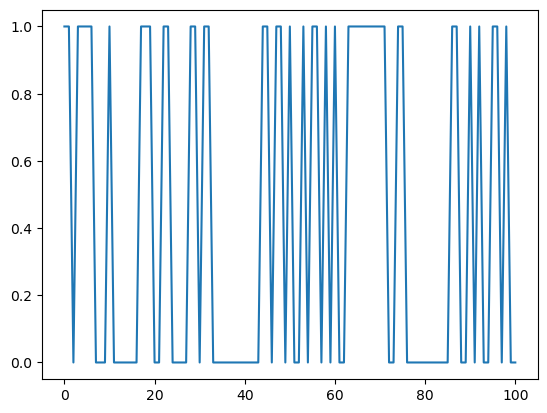

In [10]:
ZOO.catsize.plot()

<AxesSubplot:>

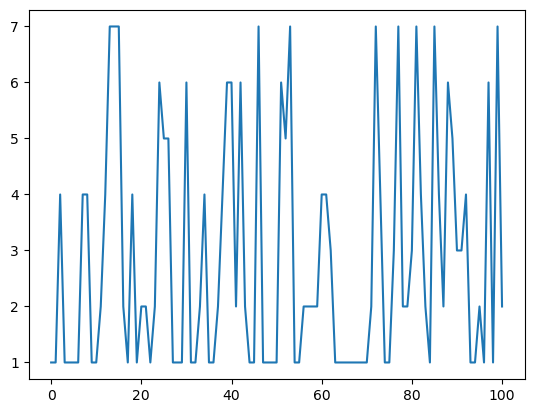

In [11]:
ZOO.type.plot()

In [12]:
#Cleaning The Data

ZOO.isnull().sum()


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

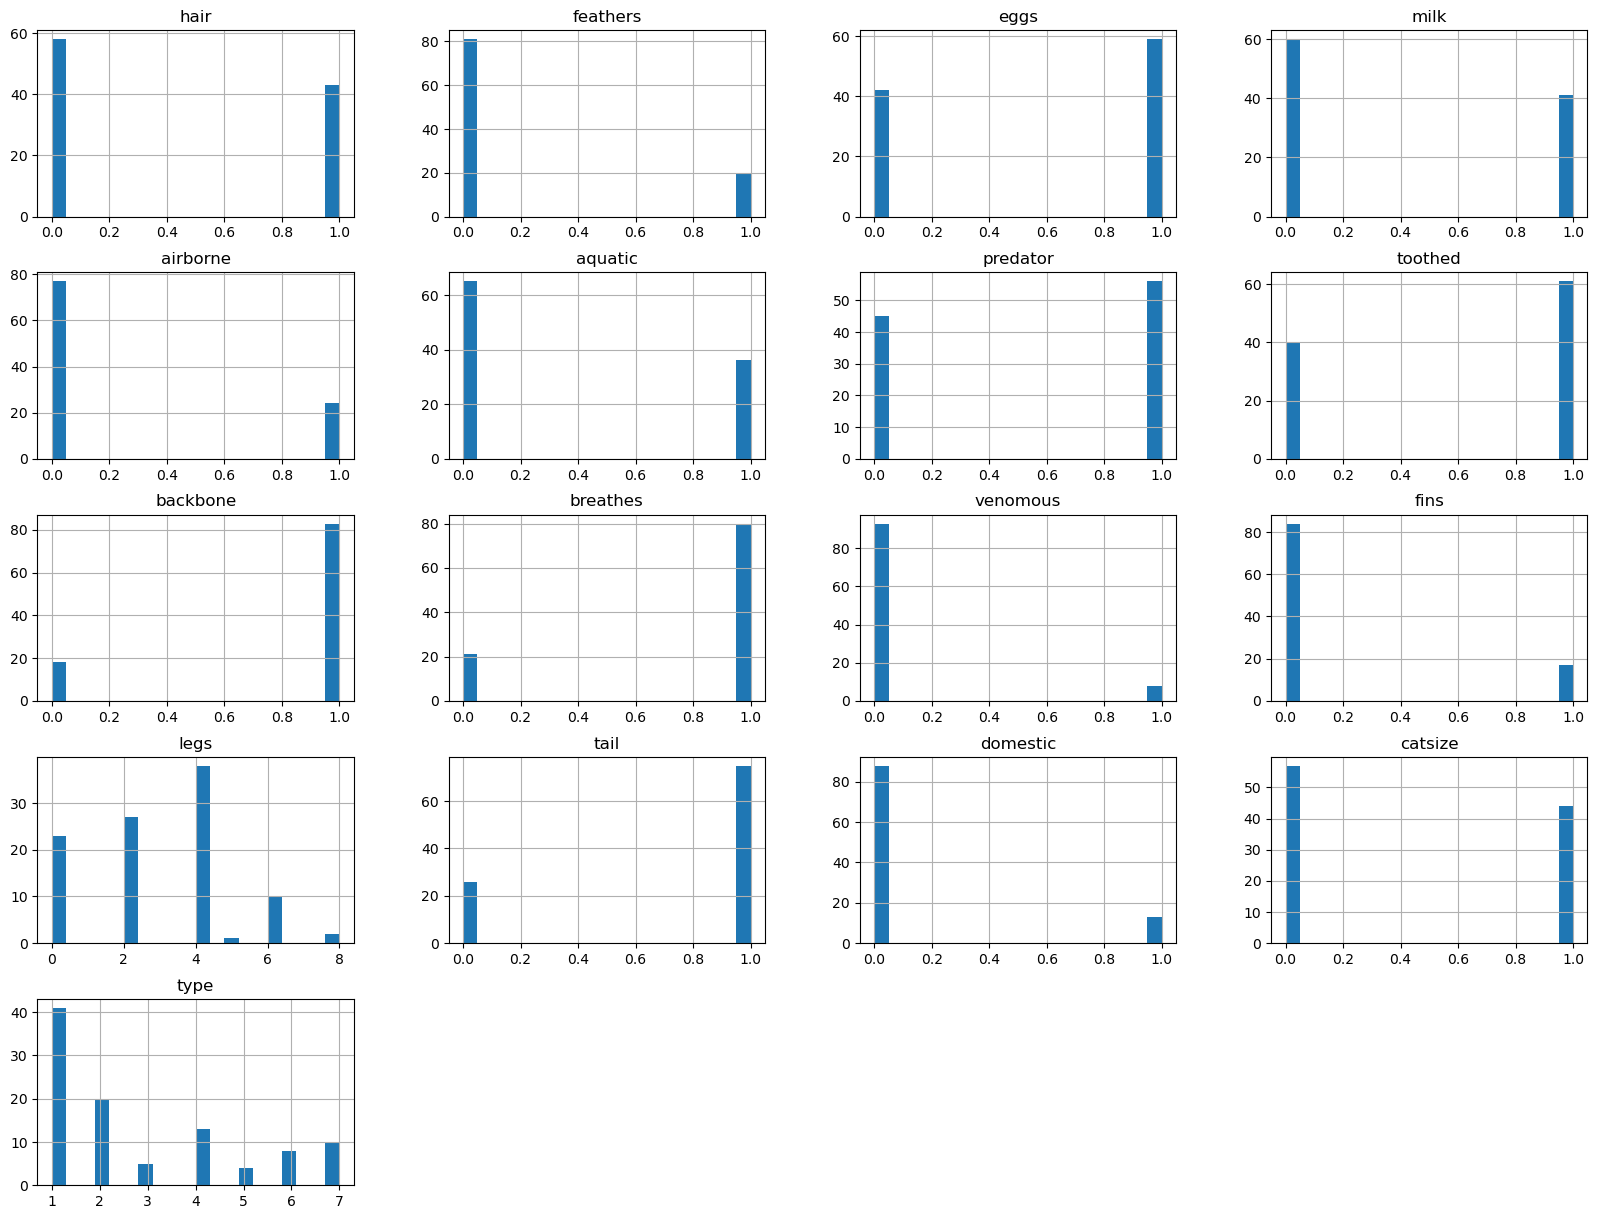

In [13]:
#Univariate Analysis

ZOO.hist(bins=20, figsize=(20,15))


In [14]:
#Comment : Here we got the information about that which type of animal name comes under according to this plot showing

# Segregating variables: Independent and Dependent Variables

In [15]:
#seperating independent and dependent variables
x = ZOO.drop(['type'], axis=1)
y = ZOO['type']
x.shape, y.shape

((101, 17), (101,))

In [16]:
x.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [17]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [18]:
X = ZOO.iloc[:, 1:16]
Y =ZOO.iloc[:, 17]

In [19]:
num_folds = 10
kfold = KFold(n_splits=10)

In [20]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [21]:
print(results.mean())

0.78


Grid Search for Algorithm Tuning# 

In [22]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
data = read_csv("Zoo.csv")

X = data.iloc[:, 1:16]
Y =data.iloc[:, 17]

In [24]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [25]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [26]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# Visualizing the CV results

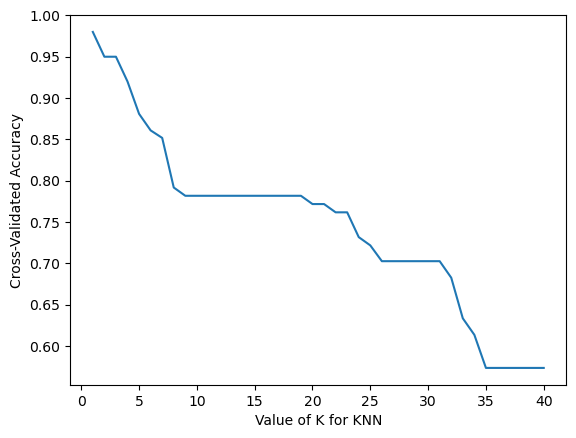

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Defining The Variables

In [28]:
ZOO.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [29]:
X = ZOO.iloc[:,1:17]

In [30]:
X=pd.get_dummies(X)


In [31]:
X=X.values


In [32]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [33]:
Y = ZOO.iloc[:,-1].values


In [34]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size =.25, random_state = 42)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
KNN = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=None)

In [39]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [40]:
Y_pred=KNN.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(Y_test.reshape(-1,1), Y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           0.88        26
   macro avg       0.79      0.77      0.76        26
weighted avg       0.92      0.88      0.89        26



In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
print('Cross Val',cross_val_score(KNN, Y_test.reshape(-1,1),Y_pred))

Cross Val [0.5 0.8 0.8 0.8 0.6]


In [45]:
print('Cross Val',np.mean(cross_val_score(KNN, Y_test.reshape(-1,1),Y_pred)))

Cross Val 0.7000000000000001


# Obervations

Here we implement a KNN model to classify the animals in to categorie.

We use hist plot to see univariate analysis of all columns.

Here we used Kfold, Cross Val Score, KNeighborsClassifier and Grid Search for Algorithm Tuning.

Classification report, accuracy = 88%

When we use train test split we got 70% cross val score, we got 78% cross val score while using Kfold but Grid Search for algorithm tuning we obtained grid best score is 96%.

In [ ]:
#End of Assignment

In [47]:
"""
Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?
"""

'\nInterview Questions:\n1. What are the key hyperparameters in KNN?\n2. What distance metrics can be used in KNN?\n'

ANS- 1. What are the key hyperparameters in KNN?

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks. While KNN is relatively straightforward, it does have some key hyperparameters that can affect its performance:

*Number of Neighbors (k):

The number of nearest neighbors to consider when making predictions. Choosing an appropriate value for k is critical; a smaller value of k might lead to overfitting, while a larger value might lead to underfitting.

*Distance Metric:

The distance metric used to measure the distance between data points. Common distance metrics include:
Euclidean distance,Manhattan distance,Minkowski distance.

*Weighting Scheme:

Determines how the contributions of neighboring points are weighted when making predictions. Common weighting schemes include:
Uniform weighting: All neighbors contribute equally to the prediction.
Distance weighting: The contribution of each neighbor is weighted by its distance, with closer neighbors having a higher influence.

*Algorithm:

The algorithm used to compute nearest neighbors. The two main algorithms are:
Brute force: Computes distances between all pairs of data points and selects the k-nearest neighbors.
KD-tree or Ball tree: Data structures that organize data points to efficiently find nearest neighbors.

*Leaf Size (for tree-based algorithms):

The maximum number of points in a leaf node of the KD-tree or Ball tree. Smaller leaf sizes may result in faster tree construction but slower querying.

*Parallelization (for large datasets):

Some implementations of KNN may offer options for parallelization, allowing the algorithm to leverage multiple CPU cores for faster computation, especially on large datasets.

ANS-2. What distance metrics can be used in KNN?

Here are some common distance metrics used in KNN:

*Euclidean Distance:

Euclidean distance is one of the most widely used distance metrics in KNN.
It measures the straight-line distance between two points in Euclidean space.

*Manhattan Distance (Taxicab or City Block Distance):

Manhattan distance measures the distance between two points by summing the absolute differences of their coordinates.
It is named after the distance a taxicab would travel in a grid-like city, where movements are restricted to horizontal and vertical paths.

*Minkowski Distance:

Minkowski distance is a generalization of both Euclidean and Manhattan distances.

*Chebyshev Distance:

Chebyshev distance calculates the maximum absolute difference between the coordinates of two points along any dimension.
It can be interpreted as the distance a king would move on a chessboard.

*Hamming Distance (for categorical data):

Hamming distance is used for comparing binary vectors of equal length.
It counts the number of positions at which the corresponding symbols are different.
It is often used in text mining and genetics.
For instance, if comparing two strings of equal length, the Hamming distance is the number of positions at which the corresponding characters are different.